In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from ast import literal_eval

In [ ]:
save = False

if save:
    sns.set(font_scale=1.8)


In [14]:
ted_talks = pd.read_csv("../data/ted_talks_selected.csv")
ted_talks

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,2,Simple designs to save a life,Amy Smith,"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th..."
2,3,How to rebuild a broken state,Ashraf Ghani,{0: ['president-elect of afghanistan']},"{0: 'Ashraf Ghani, Afghanistan’s new president...",981920,2005-07-12,2006-10-18,TEDGlobal 2005,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",75.0,1125,"['business', 'corruption', 'culture', 'economi...","{127: 'Want to help Africa? Do business here',...",Ashraf Ghani's passionate and powerful 10-minu...,"A public, Dewey long ago observed, is constitu..."
3,4,The real future of space exploration,Burt Rutan,{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav..."
4,5,Great cars are great art,Chris Bangle,{0: ['car designer']},{0: 'Car design is a ubiquitous but often over...,978483,2002-02-02,2007-04-05,TED2002,"['ar', 'bg', 'de', 'en', 'es', 'fr', 'he', 'hr...",81.0,1204,"['business', 'cars', 'design', 'industrial des...","{4: 'The real future of space exploration', 26...",American designer Chris Bangle explains his ph...,"What I want to talk about is, as background, i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3952,62707,The wildly complex anatomy of a sneaker,Angel Chang,NaN,{0: 'Angel Chang is a womenswear designer work...,219171,2020-04-23,2020-04-23,TED-Ed,"['el', 'en', 'es', 'fr', 'ko', 'pt', 'pt-br']",NaN,303,"['TED-Ed', 'education', 'animation', 'fashion'...",{2756: 'What really happens to the plastic you...,"Australians call them ""runners."" The British k...","Australians call them “runners."" The British k..."
3953,62748,A global pandemic calls for global solutions,Larry Brilliant,"{0: ['epidemiologist', 'philanthropist'], 1: [...","{0: ""TED Prize winner Larry Brilliant has spen...",760969,2020-04-22,2020-04-24,TED2020: The Prequel,"['en', 'es', 'it', 'pt-br']",37.0,941,"['coronavirus', 'pandemic', 'epidemiology', 'v...","{58: 'My wish: Help me stop pandemics', 61303:...",Examining the facts and figures of the coronav...,"Helen Walters: So, Chris, who's up first? Chri..."
3954,62782,The dark history of IQ tests,Stefan C Dombrowski,NaN,NaN,307187,2020-04-27,2020-04-27,TED-Ed,"['en', 'es', 'my', 'pt-br']",NaN,346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo..."
3955,62784,The electrifying speeches of Sojourner Truth,Daina Ramey Berry,NaN,NaN,56582,2020-04-28,2020-04-30,TED-Ed,['en'],NaN,257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ..."


In [ ]:
ted_talks.describe()

# Les plus vus

In [ ]:
most_viewed = ted_talks[["title", "views"]].sort_values(by='views', ascending=False).head(10).reset_index(drop=True)
most_viewed

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=list(range(10)), y=most_viewed.views)
plt.title("Les 10 conférences les plus vues")
plt.xlabel("Conférence")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/most_viewed.png")
plt.show()

# Durées

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks.duration / 60)
plt.title("Durée des conférences en minutes")
plt.xlabel("Durée (minutes)")
plt.ylabel("Nombre de conférences")
if save: plt.savefig("../data/graphs/duration.png")
plt.show()

# Corrélations

In [ ]:
plt.figure(figsize=(8, 6))

sns.heatmap(ted_talks.drop("talk_id", axis=1).corr(), mask=np.eye(3), annot=True, cmap="RdBu", center=0)
plt.title("Corrélations entre les variables numériques")
if save: plt.savefig("../data/graphs/correlations.png")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x=ted_talks.views, y=ted_talks.comments)
plt.title("Nombre de commentaires selon le nombre de vues")
plt.xlabel("Nombre de vues")
plt.ylabel("Nombre de commentaires")
if save: plt.savefig("../data/graphs/comments_views.png")
plt.show()

# Thèmes à débat

In [ ]:
ted_talks["comment_rate"] = ted_talks.comments / ted_talks.views * 1e6

In [ ]:
plt.figure(figsize=(10, 6))

sns.histplot(ted_talks["comment_rate"])
plt.title("Ratio commentaires / vues")
plt.xlabel("Ratio")
plt.ylabel("Compte")
if save: plt.savefig("../data/graphs/comment_rate.png")
plt.show()

In [ ]:
most_commented_topics = ted_talks.sort_values(by="comment_rate", ascending=False).topics.head(100)

most_commented_topics = most_commented_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_commented_topics = most_commented_topics[most_commented_topics > 10]

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus débattus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus débattues")
if save: plt.savefig("../data/graphs/debated_topics.png")
plt.show()

# Thèmes les plus vus

In [ ]:
most_viewed_topics = ted_talks.sort_values(by="views", ascending=False).topics.head(100)

most_viewed_topics = most_viewed_topics.apply(lambda x: literal_eval(x)).explode().value_counts()

most_viewed_topics = most_viewed_topics[most_viewed_topics > 10]

In [ ]:
plt.figure(figsize=(10, 6))

sns.barplot(x=most_commented_topics, y=most_commented_topics.index)
plt.title("Thèmes les plus vus")
plt.xlabel("Nombre d'apparitions du thème dans les 100 conférences les plus vues")
if save: plt.savefig("../data/graphs/viewed_topics.png")
plt.show()

# Orateurs

In [ ]:
plt.figure(figsize=(10, 6))

frequent_speakers = ted_talks.speaker_1.value_counts().head(10)

sns.barplot(x=frequent_speakers, y=frequent_speakers.index)
plt.title("Orateurs les plus actifs")
plt.xlabel("Nombre de conférences réalisées")
if save: plt.savefig("../data/graphs/speakers.png")
plt.show()

In [ ]:
most_common_occupations = ted_talks.occupations.apply(lambda x: literal_eval(x)[0] if pd.notna(x) else x).explode().value_counts()[1:].head(10)

plt.figure(figsize=(10, 6))

sns.barplot(x=most_common_occupations, y=most_common_occupations.index)
plt.title("Métiers les plus fréquents")
plt.xlabel("Nombre d'apparitions du métier dans les conférences")
if save: plt.savefig("../data/graphs/frequent_occupations.png")
plt.show()

In [ ]:
ted_talks.recorded_date = ted_talks.apply(lambda x: x.recorded_date if pd.notnull(x.recorded_date) else x.published_date, axis=1)
ted_talks.recorded_date = pd.to_datetime(ted_talks.recorded_date)

talks_by_year = ted_talks.recorded_date.dt.year.value_counts()
# talks_by_year = talks_by_year[talks_by_year.index < 2020]

plt.figure(figsize=(10, 6))

sns.lineplot(x=talks_by_year.index, y=talks_by_year)
plt.title("Évolution du nombre de conférences dans le temps")
plt.xlabel("Années")
plt.ylabel("Nombre de conférences annuelles")
if save: plt.savefig("../data/graphs/talks_evolution.png")
plt.show()

In [ ]:
talks_by_month = ted_talks.recorded_date.dt.month.value_counts().sort_index()
months = ["Janvier", "Février", "Mars", "Avril", "Mai", "Juin", "Juillet", "Août", "Septembre", "Octobre", "Novembre", "Décembre"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=talks_by_month)
plt.xticks(rotation=45)
plt.title("Distribution des conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de conférences mensuelles")
if save: plt.savefig("../data/graphs/months_talks.png")
plt.show()

In [ ]:
ted_talks["recorded_month"] = ted_talks.recorded_date.dt.month

views_by_months = ted_talks.groupby("recorded_month").sum()["views"]

plt.figure(figsize=(12, 8))

sns.barplot(x=months, y=views_by_months)
plt.xticks(rotation=45)
plt.title("Nombre de vues selon le mois de l'année")
plt.xlabel("Mois de l'année")
plt.ylabel("Nombre de vues")
if save: plt.savefig("../data/graphs/months_views.png")
plt.show()

In [ ]:
talks_by_year_month = ted_talks.groupby(pd.Grouper(key="recorded_date", freq="M")).count()["talk_id"]
talks_by_year_month = talks_by_year_month[talks_by_year_month.index.year > 1996]
talks_by_year_month

In [ ]:
years = talks_by_year_month.index.year.unique()

df_year_month = []

for year in years:
    to_append = list(talks_by_year_month[talks_by_year_month.index.year == year])
    if year == 1984:
        to_append = [0] + to_append
    df_year_month.append(to_append)

df_year_month = pd.DataFrame(df_year_month, columns=months)
df_year_month.index = years
df_year_month.fillna(0, inplace=True)

In [ ]:
plt.figure(figsize=(10, 8))

sns.heatmap(pd.DataFrame(df_year_month), cmap="RdBu", center=0)
plt.title("Évolution du nombre de conférences au cours des mois")
plt.xlabel("Mois de l'année")
plt.ylabel("Années")
if save: plt.savefig("../data/graphs/year_month_evolution.png")
plt.show()

# Boxplots

In [ ]:
sns.boxplot(x=ted_talks.views)
plt.show()

In [ ]:
sns.boxplot(x=ted_talks.duration / 60)
plt.show()

In [ ]:
sns.boxplot(x=ted_talks.comments)
plt.show()

# Thèmes

In [ ]:
# Source : https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173
def boolean_df(item_lists, unique_items):
    # Create empty dict
    bool_dict = {}
    
    # Loop through all the tags
    for i, item in enumerate(unique_items):
        
        # Apply boolean mask
        bool_dict[item] = item_lists.apply(lambda x: item in x)
            
    # Return the results as a dataframe
    return pd.DataFrame(bool_dict)

In [ ]:
def evaluate(x):
    if pd.isna(x):
        return x
    return literal_eval(x)

ted_talks.topics = ted_talks.topics.apply(evaluate)

In [ ]:
one_hot_topics = boolean_df(ted_talks.topics, ted_talks.topics.explode().unique())
one_hot_topics["year"] = ted_talks.recorded_date.dt.year
one_hot_topics

In [ ]:
most_talked_ted = ted_talks.topics.explode().value_counts().head(12).index
most_talked = most_talked_ted.drop(["TED-Ed", "TEDx"])
most_talked

In [ ]:
top_topics_by_year = one_hot_topics.groupby("year").sum()[most_talked]
top_topics_by_year = top_topics_by_year[(top_topics_by_year.index >= 2010) & (top_topics_by_year.index != 2020)]
top_topics_by_year.index = pd.to_datetime(top_topics_by_year.index, format="%Y")
top_topics_by_year

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(top_topics_by_year)
plt.title("Evolution de la popularité des thèmes en fonction des années")
plt.xlabel("Année")
plt.xticks(rotation=45)
plt.ylabel("Nombre de conférences")
plt.legend(top_topics_by_year.columns,fontsize = 19, ncol = 2) 
if save: plt.savefig("../data/graphs/topics_evolution.png")
plt.plot()

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(one_hot_topics[most_talked].corr(),
            mask=np.tril(np.ones((10,10))).T, cmap="RdBu", center=0, annot=True)
plt.title("Corrélation entre les thèmes")
if save: plt.savefig("../data/graphs/topics_correlation.png")
plt.show()

## Nombres de métiers représentés dans les thèmes les plus populaires

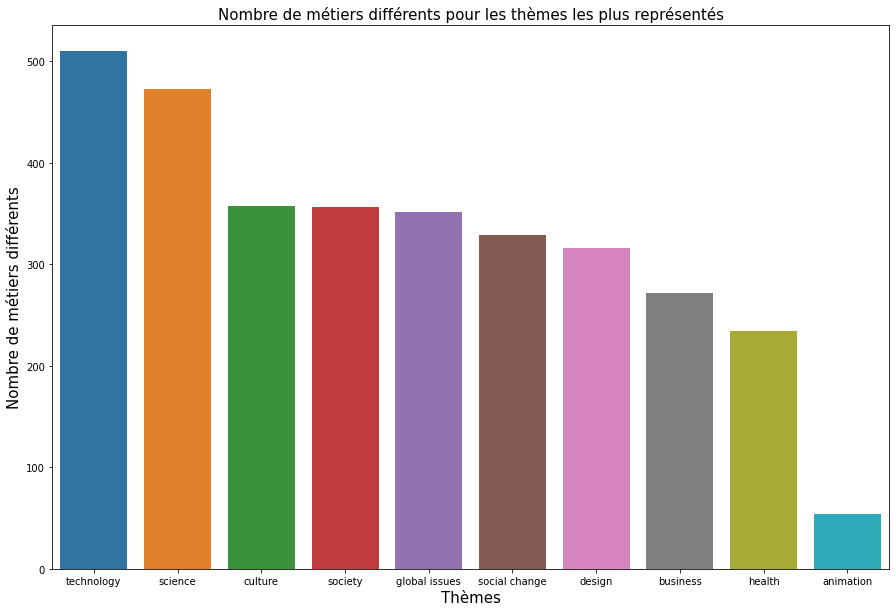

In [34]:
index_popular_topic = top_topics_by_year.columns
index_popular_topic

df_pop_occ = ted_talks[["occupations", "topics"]]

col1 = df_pop_occ.occupations.apply(lambda x : literal_eval(x)[0] if pd.notnull(x) else x ).dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col1.index]

df_pop_occ["occ0"] = col1.values

df_pop_occ.drop("occupations", axis = 1, inplace = True)

col2 = df_pop_occ.topics.dropna().explode()

df_pop_occ = df_pop_occ.copy().iloc[col2.index]

df_pop_occ["top"] = col2.values

df_pop_occ.drop("topics", axis = 1, inplace = True)

df_pop_occ.drop_duplicates(inplace = True)

df_pop_occ_counted = df_pop_occ.groupby("top").count().loc[index_popular_topic]

df_pop_occ_counted.sort_values(by = "occ0", ascending = False, inplace = True)

df_pop_occ_counted

plt.figure(figsize=(15, 10))

sns.barplot(x = df_pop_occ_counted.index, y=df_pop_occ_counted.values.reshape(1,-1)[0])
plt.title("Nombre de métiers différents pour les thèmes les plus représentés", fontsize=15)
plt.xlabel("Thèmes", fontsize=15)
plt.ylabel("Nombre de métiers différents", fontsize=15)
plt.show()

## Nombre de pays associes aux évènements

In [18]:
EventCountry = pd.read_csv("../correspondanceEventCountry.csv")
EventCountry.country.value_counts()

USA                     222
Canada                   71
England                  38
Netherlands              11
Germany                  11
Switzerland              10
Australia                 7
India                     6
Belgium                   6
Sweden                    5
Ireland                   4
Spain                     3
Scotland                  3
New Zealand               3
Israel                    3
Kenya                     3
France                    3
China                     3
Italy                     2
Japon                     2
South Africa              2
Norway                    2
Poland                    2
Greece                    2
United States             2
Mexico                    1
Africa                    1
Denmark                   1
Qatar                     1
Georgia                   1
Austria                   1
Galápagos                 1
Livonia                   1
Ghana                     1
Ethiopia                  1
Papua New Guinea    

In [20]:
result = pd.merge(ted_talks, EventCountry, on="event")
result

,talk_id,title,speaker_1,occupations,about_speakers,views,recorded_date,published_date,event,available_lang,comments,duration,topics,related_talks,description,transcript,country
0,1,Averting the climate crisis,Al Gore,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",Canada
1,2,Simple designs to save a life,Amy Smith,"{0: ['inventor', 'engineer']}","{0: 'Amy Smith designs cheap, practical fixes ...",1724438,2006-02-24,2006-08-15,TED2006,"['ar', 'bg', 'ca', 'de', 'el', 'en', 'es', 'fa...",101.0,906,"['MacArthur grant', 'alternative energy', 'des...","{1561: 'Energy from floating algae pods', 1072...",Fumes from indoor cooking fires kill more than...,"In terms of invention, I'd like to tell you th...",Canada
2,4,The real future of space exploration,Burt Rutan,{0: ['aircraft engineer']},"{0: ""In 2004, legendary spacecraft designer Bu...",2427994,2006-02-24,2006-10-25,TED2006,"['ar', 'az', 'bg', 'cs', 'de', 'el', 'en', 'es...",196.0,1177,"['NASA', 'aircraft', 'business', 'design', 'en...","{141: ""Inside the world's deepest caves"", 264:...","In this passionate talk, legendary spacecraft ...","I want to start off by saying, Houston, we hav...",Canada
3,7,Simplicity sells,David Pogue,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",Canada
4,10,The killer American diet that's sweeping the p...,Dean Ornish,"{0: ['physician', 'author']}","{0: ""Dean Ornish is a clinical professor at UC...",2690694,2006-02-23,2006-12-14,TED2006,"['ar', 'bg', 'ca', 'cs', 'de', 'el', 'en', 'eo...",209.0,198,"['culture', 'disease', 'food', 'global issues'...","{263: ""What's wrong with what we eat"", 348: ""W...",Forget the latest disease in the news: Cardiov...,With all the legitimate concerns about AIDS an...,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3940,61991,A history of Indigenous languages -- and how t...,Lindsay Morcom,{0: ['interdisciplinary researcher']},"{0: 'Lindsay Morcom researches education, Abor...",657461,2019-02-03,2020-04-07,TEDxQueensU,"['en', 'es', 'ko']",6.0,809,"['language', 'history', 'culture', 'policy', '...",{51105: 'How to save a language from extinctio...,Indigenous languages across North America are ...,"Dene elder Paul Disain said, ""Our language and...",Canada
3941,62627,An ode to living on Earth,Oliver Jeffers,"{0: ['artist', 'storyteller']}","{0: 'With a style that crackles with wry wit, ...",672908,2020-04-22,2020-04-22,TED2020: The Prequel,"['ar', 'en', 'fa', 'fr', 'tr']",12.0,646,"['Planets', 'art', 'poetry', 'life', 'love', '...",{44696: 'You are not alone in your loneliness'...,If you had to explain to a newborn what it mea...,[Oliver Jeffers] [An ode to living on Earth] H...,USA
3942,62628,How to shift your mindset and choose your future,Tom Rivett-Carnac,{0: ['political strategist']},{0: 'A political strategist focused on creatin...,772022,2020-04-22,2020-04-22,TED2020: The Prequel,"['en', 'pt-br']",31.0,954,"['climate change', 'choice', 'leadership', 'so...",{2480: 'The inside story of the Paris climate ...,"When it comes to big life problems, we often s...",I never thought that I would be giving my TED ...,USA
3943,62678,"Crisis support for the world, one text away",Nancy Lublin,{0: ['health activist']},"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,2020-04-22,2020-04-27,TED2020: The Prequel,['en'],6.0,69